# Algorithm Sandbox

This file contains work done to try to formulate an effective algorithm. This is a sandbox-type file, meant to experiment. Meaningful insights/work will be exported and summarized in a separate location.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/Users/TerryONeill/Terry_git/Capstone/GABBERT/wide_receivers/final_wr.csv')
data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [3]:
data.head()

,name,season,age,draft_pos,team,weight,bmi,games,rush_atts,rush_yds,...,rookie_season,height_inches,start_ratio,dpis_drawn,dpi_yards,pct_team_tgts,pct_team_receptions,pct_of_team_passyards,pct_team_touchdowns,years_in_league
0,David Boston,1999.0,21.0,1-8,ARI,240.0,30.8,16.0,5.0,0.0,...,1999.0,74.0,0.500000,1.0,24.0,0.145161,0.139373,0.168748,0.181818,0.0
1,Frank Sanders,1999.0,26.0,2-47,ARI,215.0,27.6,16.0,0.0,0.0,...,1999.0,74.0,1.000000,1.0,4.0,0.274194,0.275261,0.340350,0.090909,0.0
2,Rob Moore,1999.0,31.0,1-1,ARI,203.0,25.4,14.0,0.0,0.0,...,1999.0,75.0,0.714286,6.0,88.0,0.172043,0.128920,0.221548,0.454545,0.0
3,Mac Cody,1999.0,27.0,UDFA,ARI,182.0,25.4,13.0,0.0,0.0,...,1999.0,71.0,0.000000,1.0,20.0,0.019713,0.020906,0.021406,0.090909,0.0
4,Frank Sanders,2000.0,27.0,2-47,ARI,215.0,27.6,16.0,0.0,0.0,...,1999.0,74.0,1.000000,3.0,63.0,0.209386,0.170886,0.230462,0.375000,1.0


In [52]:
data[data.name == "Cecil Shorts"]

,name,season,age,draft_pos,team,weight,bmi,games,rush_atts,rush_yds,...,pct_team_tgts,pct_team_receptions,pct_of_team_passyards,pct_team_touchdowns,years_in_league,dropK,yacK,base,td_points,compilation
681,Cecil Shorts,2015.0,28.0,4-114,HOU,200.0,27.1,11.0,10.0,47.0,...,0.114855,0.112601,0.122687,0.068966,4.0,0.000000,0.000000,NaN,0.060591,NaN
2517,Cecil Shorts,2011.0,24.0,4-114,JAX,200.0,27.1,10.0,0.0,0.0,...,0.025586,0.008333,0.013768,0.083333,0.0,0.693147,0.533333,0.000597,0.036607,0.31594
2527,Cecil Shorts,2013.0,26.0,4-114,JAX,200.0,27.1,13.0,0.0,0.0,...,0.207770,0.189112,0.225806,0.187500,2.0,0.000000,0.000000,NaN,0.247096,NaN
2538,Cecil Shorts,2014.0,27.0,4-114,JAX,200.0,27.1,13.0,0.0,0.0,...,0.197487,0.163077,0.185605,0.066667,3.0,0.000000,0.000000,NaN,0.029285,NaN


In [4]:
data[data.yac.isnull() == True]

,name,season,age,draft_pos,team,weight,bmi,games,rush_atts,rush_yds,...,rookie_season,height_inches,start_ratio,dpis_drawn,dpi_yards,pct_team_tgts,pct_team_receptions,pct_of_team_passyards,pct_team_touchdowns,years_in_league
8,MarTay Jenkins,2001.0,26.0,6-193,ARI,201.0,27.3,13.0,3.0,4.0,...,1999.0,72.0,0.230769,2.0,26.0,0.102662,0.105263,0.150188,0.166667,2.0
10,MarTay Jenkins,2002.0,27.0,6-193,ARI,201.0,27.3,8.0,3.0,6.0,...,1999.0,72.0,0.125000,0.0,0.0,0.078467,0.072165,0.091241,0.055556,3.0
200,Steve Johnson,2008.0,22.0,7-224,BUF,210.0,27.0,11.0,1.0,6.0,...,2008.0,74.0,0.090909,0.0,0.0,0.029228,0.032362,0.033553,0.142857,0.0
216,Steve Johnson,2013.0,27.0,7-224,BUF,210.0,27.0,12.0,1.0,10.0,...,2008.0,74.0,1.000000,4.0,61.0,0.193487,0.173913,0.192394,0.187500,5.0
268,Corey Brown,2014.0,23.0,UDFA,CAR,190.0,25.8,13.0,8.0,95.0,...,2014.0,72.0,0.230769,2.0,38.0,0.058728,0.057065,0.075146,0.074074,0.0
414,Josh Cribbs,2006.0,23.0,UDFA,CLE,192.0,25.3,16.0,2.0,11.0,...,2005.0,73.0,0.062500,0.0,0.0,0.029297,0.031447,0.031401,0.000000,1.0
423,Josh Cribbs,2009.0,26.0,UDFA,CLE,192.0,25.3,16.0,55.0,381.0,...,2005.0,73.0,0.750000,1.0,25.0,0.083521,0.091324,0.065029,0.090909,4.0
424,Josh Cribbs,2010.0,27.0,UDFA,CLE,192.0,25.3,15.0,20.0,66.0,...,2005.0,73.0,0.333333,1.0,38.0,0.081590,0.077703,0.097692,0.076923,5.0
429,Josh Cribbs,2011.0,28.0,UDFA,CLE,192.0,25.3,16.0,7.0,25.0,...,2005.0,73.0,0.437500,2.0,36.0,0.117544,0.128125,0.167638,0.250000,6.0
433,Josh Cribbs,2012.0,29.0,UDFA,CLE,192.0,25.3,16.0,6.0,42.0,...,2005.0,73.0,0.125000,0.0,0.0,0.019435,0.021341,0.018341,0.000000,7.0


In [5]:
data.isnull().sum()

name                        0
season                      0
age                         0
draft_pos                   0
team                        0
weight                      0
bmi                         0
games                       0
rush_atts                   0
rush_yds                    0
rush_y/a                    0
rush_tds                    0
rush_ypg                    0
targets                     0
receptions                  0
rec_yards                   0
yards/reception             0
rec_tds                     0
rec_ypg                     0
ctch_pct                    0
y/tgt                       0
fumbles                     0
fumbles_recovered           0
fum_ret_yds                 0
fum_tds                     0
forced_fumbles              0
pro_bowls                   0
all_pros                    0
position                    0
100yd_gms                   0
                         ... 
recs_ovr_25               352
drops                       0
EYds      

In [6]:
print data.columns

Index([u'name', u'season', u'age', u'draft_pos', u'team', u'weight', u'bmi',
       u'games', u'rush_atts', u'rush_yds', u'rush_y/a', u'rush_tds',
       u'rush_ypg', u'targets', u'receptions', u'rec_yards',
       u'yards/reception', u'rec_tds', u'rec_ypg', u'ctch_pct', u'y/tgt',
       u'fumbles', u'fumbles_recovered', u'fum_ret_yds', u'fum_tds',
       u'forced_fumbles', u'pro_bowls', u'all_pros', u'position', u'100yd_gms',
       u'yac', u'first_down_ctchs', u'first_down_ctchpct', u'long_ctch',
       u'recs_ovr_25', u'drops', u'EYds', u'DVOA', u'DYAR', u'position.1',
       u'Hand Size in', u'Arm Length in', u'40 Yard', u'Vert Leap in',
       u'Broad Jump in', u'Shuttle', u'3Cone', u'60Yd Shuttle',
       u'team_pass_tds', u'team_pass_yds', u'team_pass_attempts',
       u'team_completions', u'total_points', u'rookie_age', u'rookie_season',
       u'height_inches', u'start_ratio', u'dpis_drawn', u'dpi_yards',
       u'pct_team_tgts', u'pct_team_receptions', u'pct_of_team_passyards

In [7]:
test_df = data[data.season == 2015]

dyar_cols = ['DVOA', 'DYAR', 'name', 'first_down_ctchs', 'yac']
dyar_df = pd.DataFrame(test_df[dyar_cols])
dyar_df.sort('yac', ascending = False)

/Users/TerryONeill/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,DVOA,DYAR,name,first_down_ctchs,yac
1604,0.085000,3.430000,Julio Jones,93.0,679.0
1854,0.197000,5.170000,Antonio Brown,84.0,587.0
1757,-0.071000,0.720000,Jarvis Landry,60.0,583.0
1816,0.103000,3.040000,Odell Beckham,67.0,581.0
1701,-0.017000,1.130000,Golden Tate,50.0,547.0
1690,-0.087000,0.560000,Demaryius Thomas,63.0,498.0
3248,0.461231,6.326969,Jordan Reed,54.0,484.0
1593,0.189000,3.630000,Larry Fitzgerald,65.0,469.0
641,-0.051000,0.770000,Randall Cobb,42.0,448.0
1838,-0.018000,1.120000,Jordan Matthews,44.0,433.0


In [8]:
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler

#data = df[df.season == 2015]

cols = ['name', 'rec_tds', 'rush_yds', 'rec_yards', 'DVOA', 'DYAR', 'yac', 'yards/reception',
       'ctch_pct', 'targets', 'drops', 'start_ratio', 'first_down_ctchs', 'recs_ovr_25',
       'receptions', 'y/tgt', 'EYds', 'dpis_drawn', 'dpi_yards', 'pct_team_tgts',
       'pct_team_receptions', 'pct_of_team_passyards', 'pct_team_touchdowns', 'fumbles']

scale_cols = ['rec_tds', 'rush_yds', 'rec_yards', 'DVOA', 'DYAR', 'yards/reception',
       'ctch_pct', 'targets', 'drops', 'start_ratio', 'first_down_ctchs',
       'receptions', 'y/tgt', 'EYds', 'dpis_drawn', 'dpi_yards', 'pct_team_tgts',
       'pct_team_receptions', 'pct_of_team_passyards', 'pct_team_touchdowns', 'yac']

sca = StandardScaler()
minmax = MinMaxScaler(feature_range = (1, 5), copy = False)

# for col in scale_cols:
#     data[col] = minmax.fit_transform(data[col])
#     #data[col] = data[col] + 1

In [9]:
### finding averages for the 2015 season

## average touchdowns per player
print np.average(data.rec_tds)

2.22386223862


In [10]:
## average fumbles per player
print np.average(data.fumbles)

0.691881918819


In [11]:
## average total yards (receiving plus rushing) per player
print np.average(data.rush_yds + data.rec_yards)

383.578720787


In [12]:
print np.average(data.rec_yards)

371.407134071


In [13]:
## average DVOA per player

print np.average(data.DVOA)

-0.0182444649447


In [14]:
## average DYAR per player
print np.average(data.DYAR)

0.755839454355


In [15]:
## average YAC per player
print np.average(data.yac)

nan


In [16]:
## average yards per reception (yards/catch) per player
print np.average(data['yards/reception'])

11.1433671587


In [17]:
## average catch rate per player
print np.average(data.ctch_pct)

0.497622693727


In [18]:
## average targets per player
print np.average(data.targets)

48.8216482165


In [19]:
## average number of drops per player
print np.average(data.drops)

2.34501845018


In [20]:
## average start ratio per player
print np.average(data.start_ratio)

0.39597842024


In [21]:
## average number of catches for first down per player
print np.average(data.first_down_ctchs)

17.7669126691


In [22]:
## average receptions over 25 yards per player
print np.average(data.recs_ovr_25)

nan


In [23]:
## average total receptions on the season per player
print np.average(data.receptions)

27.9824723247


In [24]:
## average yards per target per player
print np.average(data['y/tgt'])

6.26874231242


In [25]:
## average Expected yards per player
print np.average(data.EYds)

### This needs to be further examined as some of these values are way too big

199.59901599


In [26]:
## average defensive PI drawn per player
print np.average(data.dpis_drawn)

0.69926199262


In [27]:
## average yards from DPI drawn per player
print np.average(data.dpi_yards)

12.7899753998


In [28]:
## average percentage of team targets per player
print np.average(data.pct_team_tgts)

0.0874453199619


In [29]:
## average percentage of team receptions per player
print np.average(data.pct_team_receptions)

0.0831790659931


In [30]:
## average percentage of team passing yards per player
print np.average(data.pct_of_team_passyards)

0.102599377968


In [31]:
## average percentage of team touchdowns per player
print np.average(data.pct_team_touchdowns)

0.0958005267851


In [32]:
## PAR was our initial test metric to get a performance baseline
## It is pretty much every players performance in a category compared to the league
## average of that category

# data['PAR'] = (data.rec_tds/np.average(data.rec_tds) + 
#               (data.rush_yds + data.rec_yards)/np.average(data.rush_yds + data.rec_yards)+
#               data.DVOA/np.average(data.DVOA) +
#               data.DYAR/np.average(data.DYAR)+
#               data['yards/reception']/np.average(data['yards/reception'])+
#               data.ctch_pct/np.average(data.ctch_pct) -
#               data.drops/2+
#               data.start_ratio/np.average(data.start_ratio)+
#               data.first_down_ctchs/np.average(data.first_down_ctchs)+
#               data.recs_ovr_25/np.average(data.recs_ovr_25)+
#               data.receptions/np.average(data.receptions)+
#               data['y/tgt']/np.average(data['y/tgt'])+
#               data.dpis_drawn/np.average(data.dpis_drawn)+
#               data.dpi_yards/np.average(data.dpi_yards)+
#               data.pct_team_tgts/np.average(data.pct_team_tgts)+
#               data.pct_team_receptions/np.average(data.pct_team_receptions)+
#               data.pct_of_team_passyards/np.average(data.pct_of_team_passyards)+
#               data.pct_team_touchdowns/np.average(data.pct_team_touchdowns))


data['dropK'] = np.log(data['drops'] +1)
data['yacK'] = data.yac*(data.yac/data.rec_yards)
data['base'] = (((data.rec_yards+data.yacK+data.dpi_yards+(data.DYAR*100))*(data.receptions+(data.first_down_ctchs*data.first_down_ctchpct)+((data.recs_ovr_25**2)/data.receptions)))/(data.fumbles+data.dropK + (data.targets/data.pct_team_tgts))**2)
data['td_points'] = (((data.rec_tds+data.rush_tds)/np.average(data.rec_tds+data.rush_tds))*data.pct_team_touchdowns)
data['compilation'] = (data.base*100) + (data.td_points*7)

In [33]:
data.sort('compilation', ascending = False)

/Users/TerryONeill/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,name,season,age,draft_pos,team,weight,bmi,games,rush_atts,rush_yds,...,pct_team_tgts,pct_team_receptions,pct_of_team_passyards,pct_team_touchdowns,years_in_league,dropK,yacK,base,td_points,compilation
1764,Randy Moss,2003.0,26.0,1-21,MIN,215.0,26.2,16.0,6.0,18.0,...,0.330769,0.333333,0.413060,0.531250,4.0,2.302585,118.088848,1.388948,3.967260,166.665584
1628,Steve Smith,2005.0,26.0,3-74,CAR,185.0,27.3,16.0,4.0,25.0,...,0.278293,0.318885,0.403876,0.400000,4.0,2.079442,419.769674,1.312552,2.284263,147.245014
1629,Steve Smith,2005.0,26.0,3-74,CAR,185.0,27.3,16.0,4.0,25.0,...,0.278293,0.318885,0.403876,0.400000,4.0,2.079442,419.769674,1.312552,2.284263,147.245014
1673,Rod Smith,2001.0,31.0,UDFA,DEN,200.0,27.1,15.0,3.0,27.0,...,0.336595,0.362179,0.456803,0.423077,2.0,2.302585,304.036485,1.269794,2.044348,141.289802
1735,Marvin Harrison,2001.0,29.0,1-19,IND,175.0,23.7,16.0,1.0,3.0,...,0.294434,0.312321,0.382051,0.555556,2.0,2.079442,150.551837,1.156636,3.660678,141.288396
2445,Jimmy Smith,1999.0,30.0,2-36,JAX,213.0,28.1,16.0,0.0,0.0,...,0.291737,0.330484,0.412195,0.285714,0.0,2.397895,167.833741,1.350552,0.753054,140.326566
1604,Julio Jones,2015.0,26.0,1-6,ATL,220.0,26.8,16.0,0.0,0.0,...,0.326892,0.331707,0.426974,0.380952,4.0,1.945910,246.414217,1.297214,1.338762,139.092704
1736,Marvin Harrison,2002.0,30.0,1-19,IND,175.0,23.7,16.0,2.0,10.0,...,0.329582,0.352217,0.412060,0.407407,3.0,2.833213,123.415215,1.233106,1.968631,137.091020
1726,Andre Johnson,2008.0,27.0,1-3,HOU,219.0,27.4,16.0,0.0,0.0,...,0.308108,0.313351,0.369112,0.380952,4.0,1.791759,154.316825,1.257924,1.338762,135.163702
1863,Terrell Owens,2001.0,28.0,3-89,SF,226.0,28.2,16.0,4.0,21.0,...,0.288104,0.273529,0.385371,0.484848,2.0,2.397895,192.238669,1.071960,3.407759,131.050307


In [51]:
data[data.name == "Tim Brown"]

,name,season,age,draft_pos,team,weight,bmi,games,rush_atts,rush_yds,...,pct_team_tgts,pct_team_receptions,pct_of_team_passyards,pct_team_touchdowns,years_in_league,dropK,yacK,base,td_points,compilation
1073,Tim Brown,2003.0,37.0,1-6,OAK,195.0,26.4,16.0,0.0,0.0,...,0.180422,0.187050,0.206107,0.222222,NaN,1.945910,69.843034,0.158861,0.195236,17.252776
1415,Tim Brown,2004.0,38.0,1-6,TB,195.0,26.4,15.0,0.0,0.0,...,0.060547,0.070588,0.057571,0.041667,NaN,0.000000,7.605000,0.016310,0.018303,1.759123
1826,Tim Brown,1999.0,33.0,1-6,OAK,195.0,26.4,16.0,1.0,4.0,...,0.278846,0.294118,0.372402,0.250000,NaN,2.708050,198.875744,0.985961,0.658922,103.208593
1827,Tim Brown,2000.0,34.0,1-6,OAK,195.0,26.4,16.0,3.0,12.0,...,0.250943,0.241270,0.313333,0.379310,NaN,2.079442,130.043440,0.712101,1.832864,84.040162
1829,Tim Brown,2001.0,35.0,1-6,OAK,195.0,26.4,16.0,4.0,39.0,...,0.228385,0.225248,0.280926,0.300000,NaN,1.945910,123.296996,0.561393,1.186060,64.441747
1830,Tim Brown,2002.0,36.0,1-6,OAK,195.0,26.4,16.0,6.0,19.0,...,0.173025,0.164969,0.176036,0.060606,NaN,2.079442,201.601075,0.258959,0.053246,26.268585


In [34]:
## We know the nulls are all coming from if a player has zero recieving yards so you 
## cannot divide by zero and you get a null value. So we are fine putting a zero here
data.yacK.fillna(value = 0, inplace = True)

In [35]:
## average score for all receivers in compilation score

print np.average(data.compilation[data.compilation >= 0])

17.1637427517


In [36]:
data[data.name == "Odell Beckham"].sort('compilation', ascending = False)

/Users/TerryONeill/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,name,season,age,draft_pos,team,weight,bmi,games,rush_atts,rush_yds,...,pct_team_tgts,pct_team_receptions,pct_of_team_passyards,pct_team_touchdowns,years_in_league,dropK,yacK,base,td_points,compilation
1816,Odell Beckham,2015.0,23.0,1-12,NYG,198.0,27.6,15.0,1.0,3.0,...,0.253612,0.244898,0.333563,0.361111,1.0,1.791759,232.800690,0.772494,2.062182,91.684650
1815,Odell Beckham,2014.0,22.0,1-12,NYG,198.0,27.6,12.0,7.0,35.0,...,0.214168,0.237598,0.305478,0.400000,0.0,1.098612,204.819157,0.682089,2.108551,82.968792


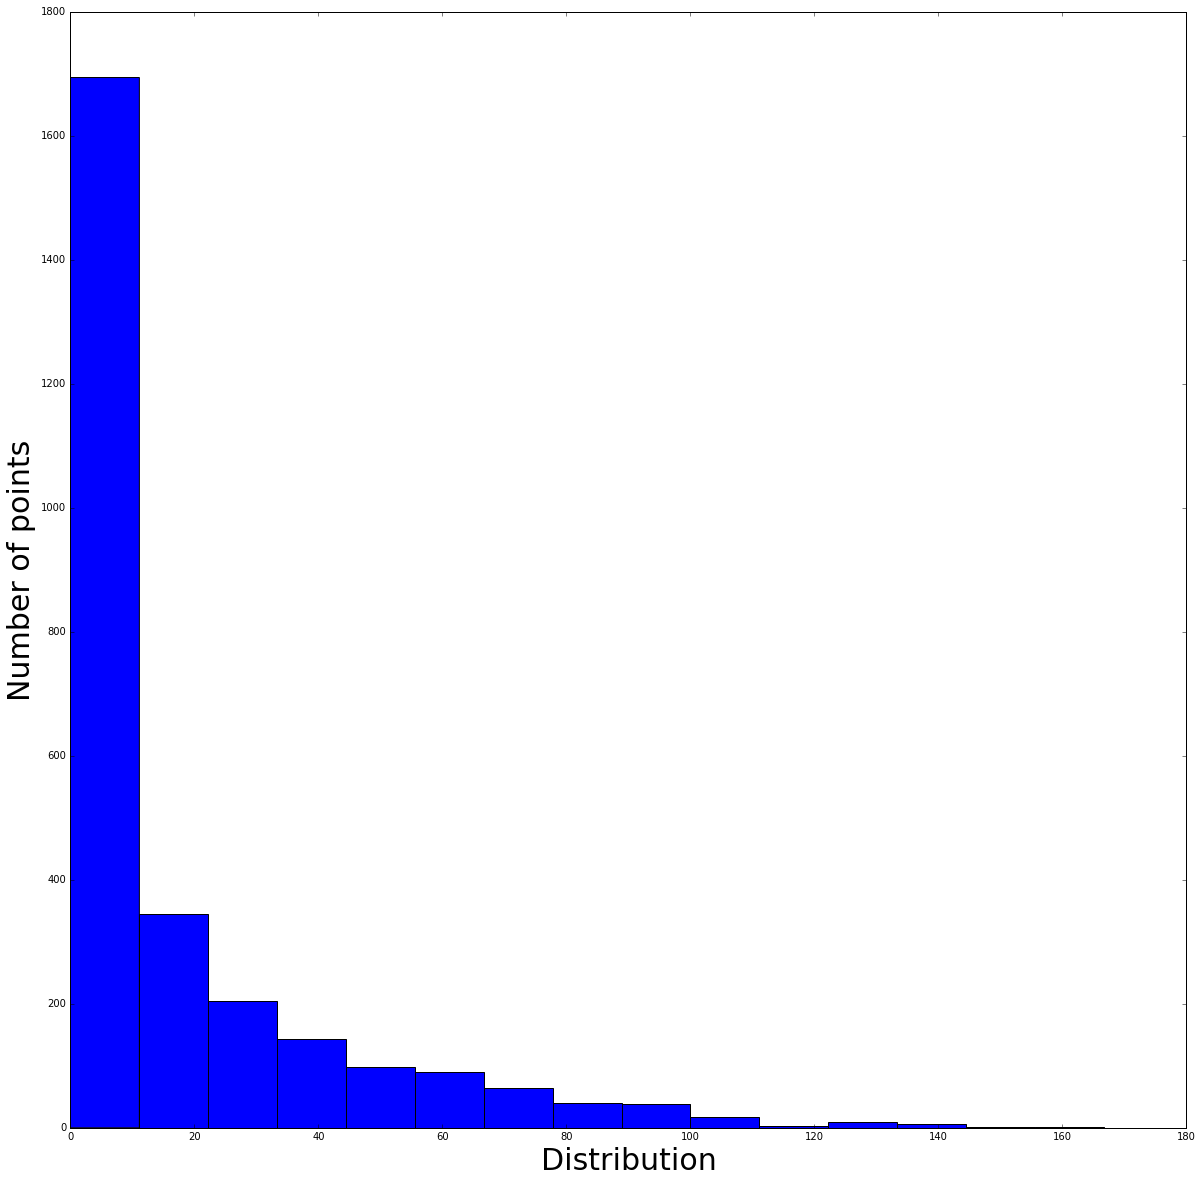

In [37]:


plt.figure(figsize = (20, 20))
plt.xlabel('Distribution', fontsize = 30)
plt.ylabel('Number of points', fontsize = 30)
plt.hist(data.compilation[data.compilation >= 0], bins = 15)
plt.show()

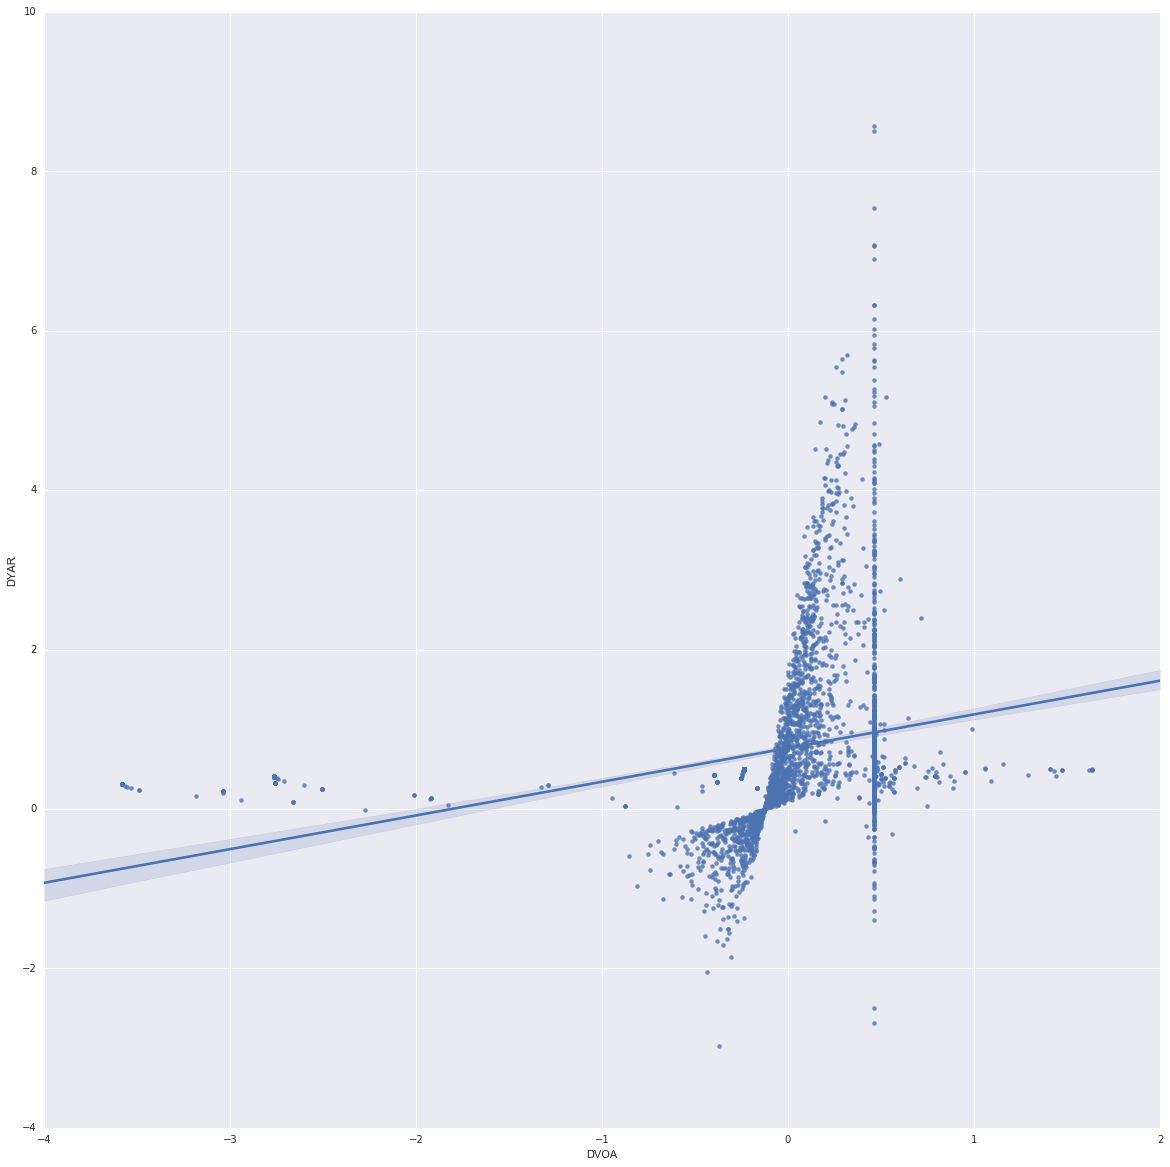

In [38]:
import seaborn as sns

plt.figure(figsize = (20, 20))
sns.regplot(data.DVOA, data.DYAR)

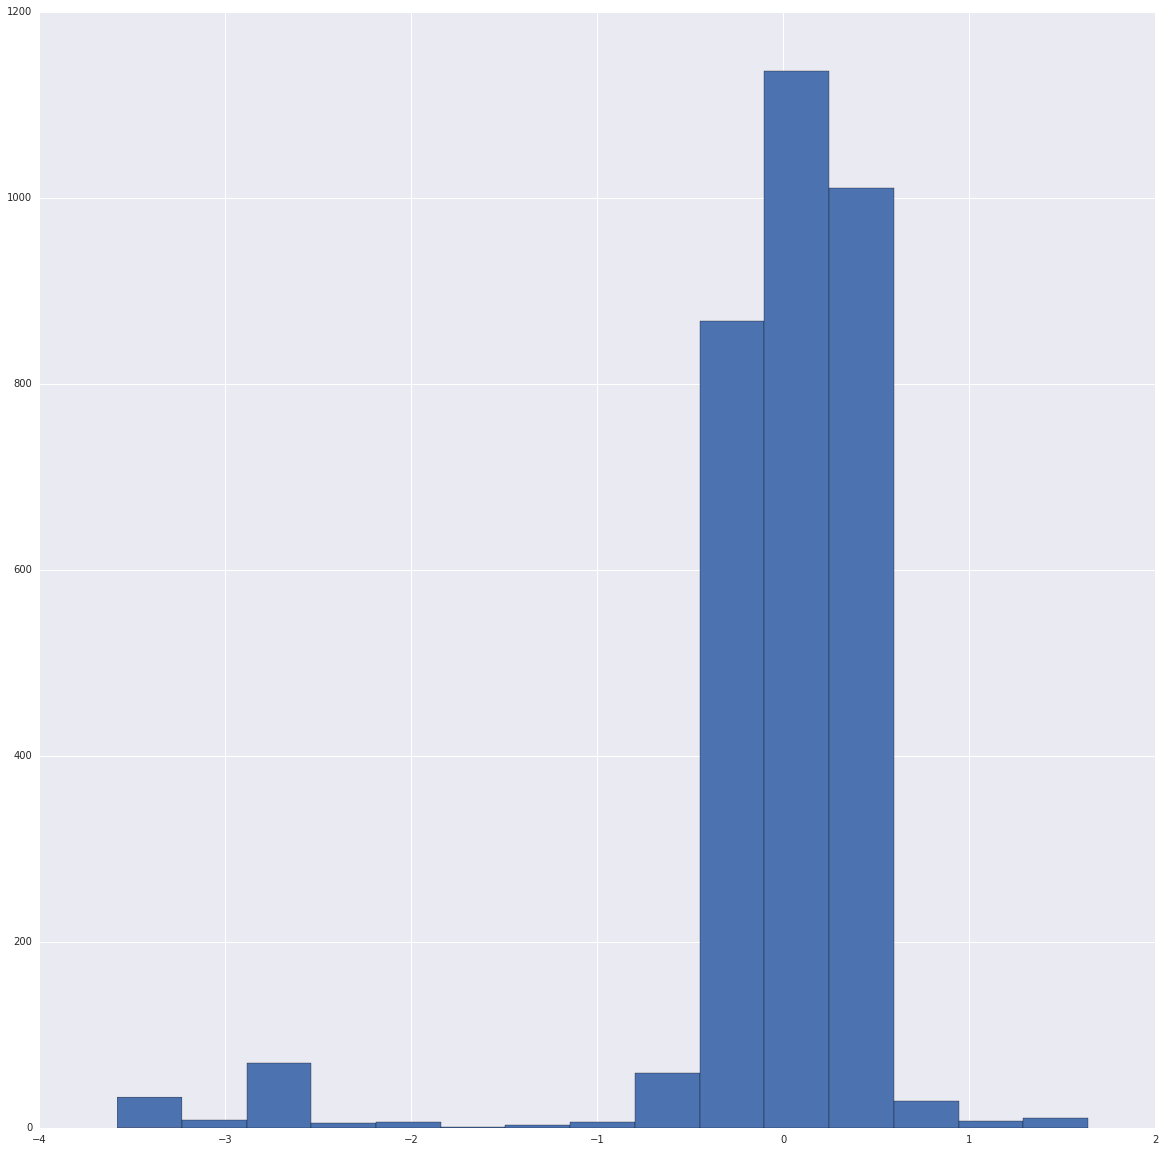

In [39]:
plt.figure(figsize = (20, 20))
plt.hist(data.DVOA, bins = 15)
plt.show()

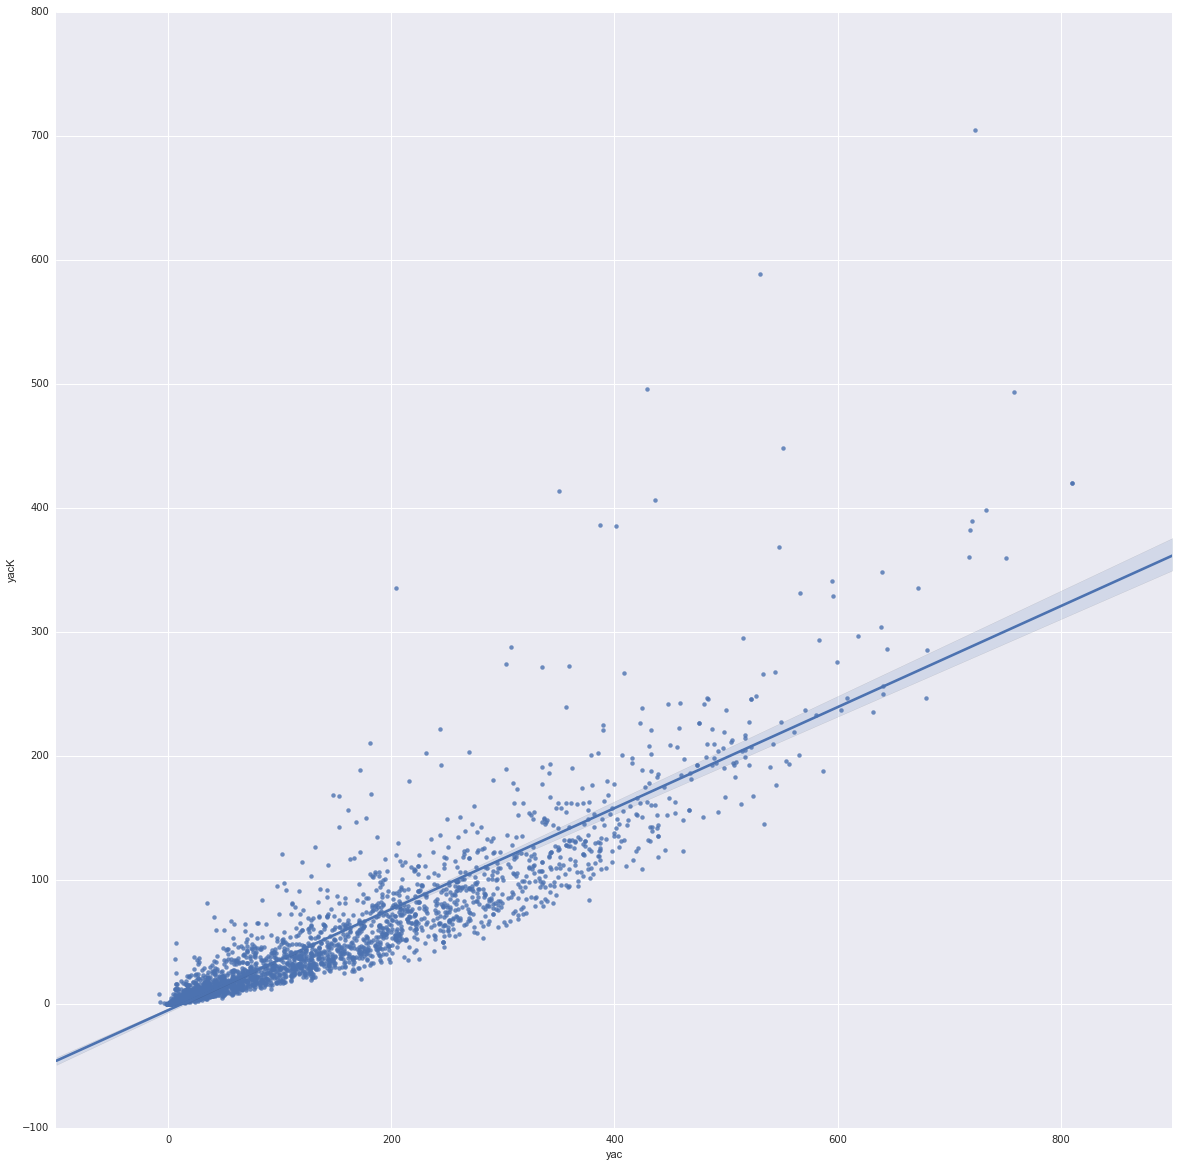

In [40]:
plt.figure(figsize = (20, 20))
sns.regplot(data.yac, data.yacK)

In [41]:
data.to_csv('/Users/TerryONeill/Terry_git/Capstone/GABBERT/wide_receivers/catcherr.csv')

In [42]:
len(data.describe().columns)

64

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import cross_val_score, cross_val_predict, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.feature_selection import SelectKBest, RFECV
from sklearn.grid_search import GridSearchCV
%matplotlib inline

df = data[scale_cols]

train = df[df.yac.isnull() == False]
test = df[df.yac.isnull() == True]

# Pare down this list of features

X = train.drop('yac', axis = 1)
y = train.yac
kbest = SelectKBest(k=16)
kbest.fit(X,y)
# Show the feature importance for Kbest of 30
kbest_importance = pd.DataFrame(zip(X.columns, kbest.get_support()), columns = ['feature', 'important?'])

kbest_features = kbest_importance[kbest_importance['important?'] == True].feature
#Here's our dataframe
X_model = X[kbest_features]

x_train, x_test, y_train, y_test = train_test_split(X_model, y)
# Let the modelling begin

all_scores = {}
def evaluate_model(estimator, title):
    model = estimator.fit(x_train, y_train)
    print model.score(x_test, y_test)
    #y_pred = model.predict(x_test)
    #acc_score = accuracy_score(y_test, y_pred)
    #con_matrix = confusion_matrix(y_test, y_pred)
    #class_report = classification_report(y_test, y_pred)
    #print "Accuracy Score:", acc_score.round(8)
#     print
#     print "Confusion Matrix:\n", con_matrix
#     print
#     print "Classification Report:\n", class_report
    #all_scores[title] = acc_score
    #print all_scores


# Models to test
lr = LinearRegression()
dt = DecisionTreeRegressor()
xt = ExtraTreesRegressor()
knn = KNeighborsRegressor()
svr = SVR()
rfc = RandomForestRegressor()
ab = AdaBoostRegressor(base_estimator = dt)


evaluate_model(lr, 'LinearRegression')
evaluate_model(dt, 'Decision Tree')
evaluate_model(xt, 'Extra Trees')
evaluate_model(knn, 'KNeighbors')
evaluate_model(svr, 'SVR')
evaluate_model(rfc, 'Random Forest')
evaluate_model(ab, 'AdaBoost')

0.887320787027
0.725648768821
0.850772449633
0.832611198103
-0.113275487505
0.849990311908
0.855417435501


In [44]:
kbest_importance

,feature,important?
0,rec_tds,True
1,rush_yds,False
2,rec_yards,True
3,DVOA,True
4,DYAR,True
5,yards/reception,False
6,ctch_pct,False
7,targets,True
8,drops,True
9,start_ratio,True


In [45]:
lr_fit = lr.fit(X_model, y)
y_pred = lr_fit.predict(test[kbest_features])


In [46]:
test['y_pred'] = y_pred
test['yac'] = test.y_pred

/Users/TerryONeill/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/TerryONeill/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [47]:
test.head()

,rec_tds,rush_yds,rec_yards,DVOA,DYAR,yards/reception,ctch_pct,targets,drops,start_ratio,...,y/tgt,EYds,dpis_drawn,dpi_yards,pct_team_tgts,pct_team_receptions,pct_of_team_passyards,pct_team_touchdowns,yac,y_pred
8,3.0,4.0,518.0,0.248,1.60,16.19,0.593,54.0,0.0,0.230769,...,9.59,584.0,2.0,26.0,0.102662,0.105263,0.150188,0.166667,286.046363,286.046363
10,1.0,6.0,250.0,-0.161,-0.11,11.90,0.488,43.0,0.0,0.125000,...,5.81,251.0,0.0,0.0,0.078467,0.072165,0.091241,0.055556,148.489038,148.489038
200,2.0,6.0,102.0,0.259,0.46,10.20,0.714,14.0,0.0,0.090909,...,7.29,165.0,0.0,0.0,0.029228,0.032362,0.033553,0.142857,76.085124,76.085124
216,3.0,10.0,597.0,-0.155,-0.24,11.48,0.515,101.0,0.0,1.000000,...,5.91,656.0,4.0,61.0,0.193487,0.173913,0.192394,0.187500,349.748852,349.748852
268,2.0,95.0,296.0,0.077,0.59,14.10,0.583,36.0,0.0,0.230769,...,8.22,324.0,2.0,38.0,0.058728,0.057065,0.075146,0.074074,172.022574,172.022574


In [48]:
names_df = pd.DataFrame(data.name)

added = test.join(names_df)


In [49]:
added.sort('yac', ascending = False)

/Users/TerryONeill/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,rec_tds,rush_yds,rec_yards,DVOA,DYAR,yards/reception,ctch_pct,targets,drops,start_ratio,...,EYds,dpis_drawn,dpi_yards,pct_team_tgts,pct_team_receptions,pct_of_team_passyards,pct_team_touchdowns,yac,y_pred,name
452,6.0,110.0,1097.0,-0.035000,0.930000,13.71,0.640,125.0,0.0,0.875000,...,967.000000,3.0,34.0,0.229358,0.252366,0.322173,0.300000,679.521371,679.521371,Rocket Ismail
1617,10.0,0.0,1073.0,0.089000,2.390000,13.09,0.582,141.0,0.0,0.812500,...,1.443326,0.0,0.0,0.271676,0.277027,0.339772,0.416667,652.950128,652.950128,Steve Johnson
1619,6.0,0.0,1046.0,-0.047000,0.910000,13.24,0.534,148.0,0.0,1.000000,...,1.381238,2.0,15.0,0.289628,0.255663,0.319976,0.250000,611.919691,611.919691,Steve Johnson
1618,7.0,0.0,1004.0,0.000000,1.380000,13.21,0.567,134.0,0.0,1.000000,...,1.325317,5.0,75.0,0.231834,0.213483,0.271132,0.291667,597.376485,597.376485,Steve Johnson
2527,3.0,0.0,777.0,0.461231,-0.997740,11.77,0.537,123.0,0.0,1.000000,...,0.840519,0.0,0.0,0.207770,0.189112,0.225806,0.187500,491.121475,491.121475,Cecil Shorts
463,2.0,31.0,834.0,0.002000,0.870000,15.74,0.570,93.0,0.0,0.928571,...,684.000000,0.0,0.0,0.225182,0.252381,0.376014,0.142857,464.000345,464.000345,Rocket Ismail
1315,2.0,17.0,698.0,-0.035000,0.570000,15.86,0.550,80.0,0.0,0.687500,...,586.000000,0.0,0.0,0.160000,0.156028,0.207986,0.105263,389.289310,389.289310,Josh Morgan
1310,3.0,61.0,527.0,-0.176000,-0.310000,10.13,0.650,80.0,0.0,0.937500,...,465.000000,2.0,34.0,0.151515,0.166667,0.172674,0.130435,374.047832,374.047832,Josh Morgan
1560,2.0,25.0,510.0,-0.069000,0.320000,10.63,0.658,73.0,0.0,0.937500,...,496.000000,0.0,0.0,0.154989,0.157895,0.144845,0.076923,355.033452,355.033452,Josh Morgan
2538,1.0,0.0,557.0,0.461231,-2.497734,10.51,0.482,110.0,0.0,0.923077,...,0.391919,0.0,0.0,0.197487,0.163077,0.185605,0.066667,353.907300,353.907300,Cecil Shorts
